In [1]:
import os
from lib.train_AI_lib import *
import torchvision.models

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [7]:
# convertAlex() # COMMENTED AS ALL IMAGES HAVE ALREADY BEEN CONVERTED


Converting Training Images
Converted 0.00%
Converted 3.65%
Converted 7.30%
Converted 10.96%
Converted 14.61%
Converted 18.26%
Converted 21.91%
Converted 25.57%
Converted 29.22%
Converted 32.87%
Converted 36.52%
Converted 40.18%
Converted 43.83%
Converted 47.48%
Converted 51.13%
Converted 54.78%
Converted 58.44%
Converted 62.09%
Converted 65.74%
Converted 69.39%
Converted 73.05%
Converted 76.70%
Converted 80.35%
Converted 84.00%
Converted 87.66%
Converted 91.31%
Converted 94.96%
Converted 98.61%
Converting Validation Images
Converted 0.00%
Converted 29.24%
Converted 58.48%
Converted 87.72%
Converting Testing Images
Converted 0.00%
Converted 29.24%
Converted 58.48%
Converted 87.72%


In [32]:
class alexNetA(nn.Module):
  def __init__(self, name):
    super(alexNetA, self).__init__()
    self.name = name
    self.conv1 = nn.Conv2d(256, 50, 5, stride=2)
    self.conv2 = nn.Conv2d(50 , 10, 5, stride=2)
    self.fc1   = nn.Linear(5*5*10, 20)
    self.fc2   = nn.Linear(20, 1)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = x.view(-1, 5*5*10)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return(x)

calcNoParam(alexNetA(''))


337601


Epoch 0 | Time Taken: 22.70s | Train rootMSE: 23.5842742920, Train loss: 556.2179565430 | Validation rootMSE: 18.1927261353, Validation loss: 330.9752807617
Epoch 1 | Time Taken: 7.14s | Train rootMSE: 15.1284265518, Train loss: 228.8692779541 | Validation rootMSE: 12.9085321426, Validation loss: 166.6302032471
Epoch 2 | Time Taken: 9.44s | Train rootMSE: 12.5593709946, Train loss: 157.7378082275 | Validation rootMSE: 11.9041156769, Validation loss: 141.7079772949
Epoch 3 | Time Taken: 8.23s | Train rootMSE: 10.9496288300, Train loss: 119.8943634033 | Validation rootMSE: 10.0277633667, Validation loss: 100.5560302734
Epoch 4 | Time Taken: 8.20s | Train rootMSE: 9.7761240005, Train loss: 95.5725936890 | Validation rootMSE: 9.3200263977, Validation loss: 86.8628845215
Epoch 5 | Time Taken: 4.20s | Train rootMSE: 9.2736082077, Train loss: 85.9998168945 | Validation rootMSE: 9.0839519501, Validation loss: 82.5181884766
Epoch 6 | Time Taken: 5.25s | Train rootMSE: 9.0234460831, Train loss: 

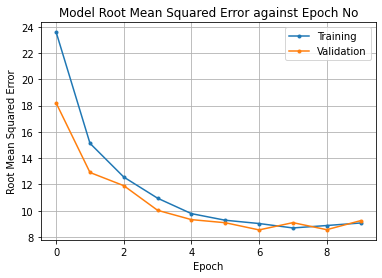

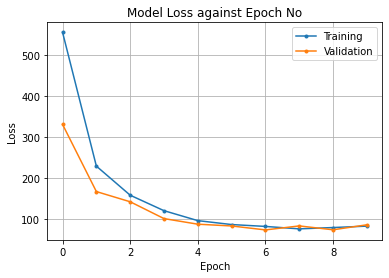

In [33]:
batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, testLoader = loadData(batchsize, inPath='saved/alexFeatures', alexNet=1)
net = alexNetA("alexNetA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, isCuda=1)